# Dark Energy Survey

<img src="https://raw.githubusercontent.com/illinois-ipaml/MachineLearningForPhysics/main/img/Project_DES-Figure.jpg" width=500 align=left></img><br>

## <span style="color:Orange">Overview</span>

The standard model of the universe, the $Λ$-CDM model, estimates that around 70% of the total energy-matter density of the universe is in the form of dark energy. The primary effect of dark energy is to acceleratingly expand the universe, hence measuring it accurately is vital to our understanding of the universe.

The Dark Energy Survey (DES) is an internationally collaborative large sky survey to map hundreds of millions of galaxies, detect thousands of supernovae, and find patterns of cosmic structure to better understand dark energy and the measure the cosmic acceleration of our expanding universe with high precision.

The instrument used by DES is the Dark Energy Camera (DECam), which is mounted on the Victor M. Blanco 4-meter Telescope at the Cerro Tololo Inter-American Observatory (CTIO) in the Chilean Andes. DECam has several major components: five optical lenses, a Hexapod positioning and alignment system, a shutter, a set of color filters, and a digital imager.

## <span style="color:Orange">Data Sources</span>

This project is based on the Data Release 1 (DR1) of the DES. We will use the `des_dr1.main` table directly from NOIRLAB's Astro Data Lab server which catalogs the DES data releases.

NOIRLAB's Astro Data Lab: https://datalab.noirlab.edu/des/access.php

## <span style="color:Orange">Importing and Setup</span>

You will need to install and import the `astro-datalab` module for data acquisition.

Please note, you will have to restart runtime to run your code after pip installing the `astro-datalab` module.

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import cluster
%matplotlib inline

# Data Lab imports
from dl import queryClient as qc, storeClient as sc
from dl.helpers.utils import convert

## <span style="color:Orange">Questions</span>

### <span style="color:LightGreen">Question 01</span>

 What is the Dark Energy Survey? What are it's main goals? What part of the night sky does the DES cover?

### <span style="color:LightGreen">Question 02</span>

Read the DES DR1 paper [[1]](https://urldefense.com/v3/__https://arxiv.org/abs/1801.03181__;!!DZ3fjg!-VVx5uQqQ6ZzOgr-EjFgoLc8lr9NMhNBQvahQLwOY5HAZ8lWfzbxhbpxn8e7OlM44QFoWvd5J20qch77Aqg$ ). What are the four completementary measurements that DES does to probe the universe? To achieve these goals, what surveys in which wave bands does DES conduct?

### <span style="color:LightGreen">Question 03</span>

What is variable or feature of the data does DES use to classify its' objects  morphologically (stars or galaxies), as described in the DR1 paper [[1]](https://arxiv.org/abs/1801.03181)

## <span style="color:Orange">Accessing Data from Data Lab</span>

Below is a sample query statement to acquire the relevant data of the `des_dr1.main` table from Astro Data Lab [[2]](https://urldefense.com/v3/__https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/StarGalQSOSeparation/StarGalQsoDESDR1.ipynb__;!!DZ3fjg!-VVx5uQqQ6ZzOgr-EjFgoLc8lr9NMhNBQvahQLwOY5HAZ8lWfzbxhbpxn8e7OlM44QFoWvd5J20qD2flJpc$ ) .



In [3]:
# Write query statement (sql) as a string
# NOTE: triple quotes allow us to break the string on multiple lines
query = """
        SELECT mag_auto_g as gmag, mag_auto_r as rmag, mag_auto_z as zmag,
               mag_auto_i as imag, mag_auto_y as ymag,
               kron_radius, spread_model_g, class_star_g, spread_model_r, class_star_r,
               spread_model_z, class_star_z,
               snr_g, snr_r, snr_z, ra, dec
        FROM des_dr1.main
        WHERE (fluxerr_auto_g>0 and fluxerr_auto_r>0 and fluxerr_auto_z>0)
        LIMIT 1000"""

# mag_auto_g,r,i,z,y = AB magnitudes in DECam g,r,i,z,y bands
# kron_radius        = Kron radius from SExtractor (pixels)
# spread_model_g,r,z = star/galaxy classifier quantifying light profile relative to PSF
# class_star_g,r,z   = star/extended source classifier (from 0 to 1)
# snr_g,r,z          = computed signal-to-noise ratios (S/N) in g,r,z bands
# ra,dec             = celestial coordinates
#
# WHERE: requirement that error>0 (to avoid dividing by zero) in g,r,z bands
# LIMIT: returns 1,000 rows that satisfy the query

In [7]:
# Execute the query synchronously, if short (e.g., LIMIT<=300,000)
# We then convert the returned result, a CSV-formatted string, to a Pandas data frame,
# making sure that any potential 'Infinity' values are converted to NaN.
sample_res = qc.query(sql=query)
sample_df = convert(sample_res,'pandas',na_values=('Infinity','-Infinity'))
print(sample_df)

          gmag       rmag       zmag       imag       ymag  kron_radius  \
0    26.003443  24.142101  23.360205  24.019503  25.463415     6.999421   
1    18.805588  18.283077  18.083220  18.141012  18.148052     3.500000   
2    26.157322  24.293480  24.010647  24.032017  23.568117     5.449837   
3    24.807178  24.104984  22.968174  23.724980  22.924305     4.134797   
4    24.365670  23.328234  22.467571  23.164433  21.884981     6.074132   
..         ...        ...        ...        ...        ...          ...   
995  24.930286  23.354115  20.821670  21.578888  20.873041     3.500000   
996  25.602820  23.840456  22.203241  23.057247  22.155275     6.419690   
997  24.269138  22.713580  21.089035  21.560870  21.044300     4.124668   
998  24.100487  22.769764  22.414814  22.396135  22.214998     3.867302   
999  25.051659  24.471111  23.942118  24.056513  23.403190     5.503956   

     spread_model_g  class_star_g  spread_model_r  class_star_r  \
0         -0.017733      0.38205

### <span style="color:LightGreen">Question 04</span>

Write a query to get the following data from the `des_dr1.main` table:

*  `mag_auto_g,r,i,z,y` = AB magnitudes in DECam g,r,i,z,y bands
*  `kron_radius`        = Kron radius from SExtractor (pixels)
* `spread_model_g,r,z` = star/galaxy classifier quantifying light profile relative to PSF
* `class_star_g,r,z`   = star/extended source classifier (from 0 to 1)
* `snr_g,r,z`          = computed signal-to-noise ratios (S/N) in g,r,z bands
* `ra`,`dec`             = celestial coordinates

Apply the following conditions and limit your query results to 100,000 samples:

*   `fluxerr_auto_X` > 0 for X in g, r, and z bands
*   -50 <= `snr_X` <= 50 for X in g, r, and z bands


Convert the acquired data into a Pandas data frame.


In [11]:
query = """
        SELECT mag_auto_g as gmag, mag_auto_r as rmag, mag_auto_z as zmag,
               mag_auto_i as imag, mag_auto_y as ymag,
               kron_radius, spread_model_g, class_star_g, spread_model_r, class_star_r,
               spread_model_z, class_star_z,
               snr_g, snr_r, snr_z, ra, dec
        FROM des_dr1.main
        WHERE (fluxerr_auto_g>0 and fluxerr_auto_r>0 and fluxerr_auto_z>0 and snr_g>-50 and snr_g<50 and snr_r>-50 and snr_r<50 and snr_z>-50 and snr_z<50)
        LIMIT 100000"""
sample_res = qc.query(sql=query)
working_df = convert(sample_res,'pandas',na_values=('Infinity','-Infinity'))
display(working_df)

,gmag,rmag,zmag,imag,ymag,kron_radius,spread_model_g,class_star_g,spread_model_r,class_star_r,spread_model_z,class_star_z,snr_g,snr_r,snr_z,ra,dec
0,22.115036,99,99.000000,99.00000,99.000000,8.449265,0.012004,0.042333,1.000000,0.349992,1.000000,0.009584,5.640619,-49.992058,-9.495123,19.846645,-53.602146
1,23.964737,99,99.000000,99.00000,99.000000,8.983423,0.008607,0.607084,1.000000,0.019274,1.000000,0.395193,2.208419,-49.986885,-6.294527,23.626489,-29.413980
2,99.000000,99,23.928865,99.00000,23.879759,3.500000,-0.100816,0.284600,-0.010246,0.012631,0.004203,0.002869,-0.268048,-49.974236,0.982654,53.554756,-44.696893
3,99.000000,99,99.000000,99.00000,99.000000,8.545079,-0.028510,0.514376,1.000000,0.418036,1.000000,0.442787,-4.645531,-49.971180,-3.901429,306.153553,-56.852316
4,22.759033,99,99.000000,99.00000,99.000000,8.618557,-0.008259,0.369813,1.000000,0.347991,1.000000,0.502264,3.931107,-49.966644,-2.693714,82.089033,-20.866155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99.000000,99,99.000000,99.00000,99.000000,7.254698,0.554058,0.347714,1.786109,0.450614,56.576515,0.352979,-1.576469,-3.557831,-1.872846,88.381617,-42.970279
99996,26.231888,99,99.000000,25.39952,99.000000,0.000000,-0.021143,0.353502,-0.006051,0.019273,0.014914,0.569570,1.191209,-3.557828,-0.457893,52.598511,-10.715876
99997,31.392279,99,99.000000,99.00000,24.443895,7.922318,-0.271700,0.353278,-0.164562,0.346653,-0.203010,0.019273,0.012019,-3.557744,-2.609829,325.225557,-41.327009
99998,99.000000,99,25.805523,24.21366,99.000000,4.092001,-0.027301,0.347147,0.002832,0.479637,-0.018696,0.434219,-1.963052,-3.557709,0.426904,40.257824,-38.550024


### <span style="color:LightGreen">Question 05</span>

The images produced by DES are used to distinguish between stars (point sources), galaxies (resolved, if not too distant), and QSOs (which may have both point-like and resolved components).

* `kron_radius`: Kron radius in pixels
* `spread_model_X`: star-galaxy classifier comparing extended model to PSF model. Value is given for each band X = *g, r, i, z, y*
* `class_star_X`: value ranging from 0.0 (not point-like) to 1.0 (point-like), for each band X = *g, r, i, z, y*

The value of `spread_model_X` is near zero for a point source (star or QSO), positive for an extended source (galaxy), negative for an artifact smaller than the PSF (e.g., bad pixel or cosmic ray).

Let's define an object as a star if `spread_model_g`<=0.5, and a galaxy if `spread_model_g` > 0.5. In our sample data, count the number of objects that are stars and the number of objects that are galaxies.

In [21]:
stars = working_df.drop(working_df[working_df.spread_model_g > 0.5].index)
print(len(stars))
galaxies = working_df.drop(working_df[working_df.spread_model_g <= 0.5].index)
print(len(galaxies))

64836
35164


### <span style="color:LightGreen">Question 06</span>

Suppose we wish to divide the imaging data observed by the DES into roughly equal subsets of data for more efficient parallel data processing and analysis. We will do so by using K-Means clustering on the data points of the area of the night sky observed by DES.

In astronomy, RA (right ascension) and Dec (declination) are the coordinates on the sky that correspond to longitude and latitude on Earth and are used to describe the position of an object. Define a subset of the data with two columns: `ra` and `dec`. Using K-Means clustering, fit the data into 2 distinct clusters.

Here, each cluster will represent a subset of data, so we want the number data points of all clusters to be roughly the same. Display the fit using the helper function `display()`. Is the result what you expected? Is this a suitable method to equally divide our data?

In [25]:
data_for_clustering = working_df[['ra', 'dec']]
a_fit = cluster.KMeans(n_clusters=2).fit(data_for_clustering)

In [26]:
def display_data(data, fit):
    n_clusters = len(np.unique(fit.labels_))
    # Pick good colors to distinguish the different clusters.
    import matplotlib.colors
    cmap = matplotlib.colors.ListedColormap(
        sns.color_palette("husl", n_clusters).as_hex())
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], s=5, c=fit.labels_, cmap=cmap)
    # Use standard axes to match the plot above.
#    plt.xlim(0, 360)
    plt.ylim(-90, +90)
    plt.xlabel('RA [degrees]')
    plt.ylabel('Dec [degrees]')
    plt.gca().set_aspect(1.)

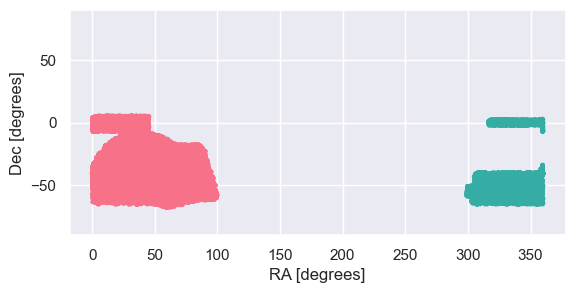

In [27]:
display_data(data_for_clustering, a_fit)

### <span style="color:LightGreen">Question 07</span>

Modify the `ra` column such that if `ra` >= 180 deg, we subtract 360 deg from `ra` for our observed sky map to be continuous. Now, change the number of clusters so that each cluster covers roughly equal area of the observed sky? For what `n_clusters` does the K-means clustering make the most sense to you?

However, you shouldn't increase `n_clusters` to an arbitrarily large number just to get equally covered area of the observed sky - each cluster would represent a subset of data we use for parallel processing, and requiring more processors is not always feasible or sensible.

In [ ]:
data_for_clustering[data_for_clustering.ra > 180]

## <span style="color:Orange">References</span>

* [__<span style="color:Red">1</span>__] Jupyter Notebook Example from Astro Data Lab using DES DR1: https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/StarGalQSOSeparation/StarGalQsoDESDR1.ipynb

* __[<span style="color:Red">2</span>]__ DES Collaboration "The Dark Energy Survey Data Release 1" ApJS 239, 18, 2018, https://arxiv.org/abs/1801.03181

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://spie.org/Publications/Proceedings/Paper/10.1117/12.2057445?SSO=1 

* Data Lab disclaimer: https://datalab.noirlab.edu/disclaimers.php

## <span style="color:Orange">Acknowledgements</span>

* Initial version: Ferzem Khan with some guidance from Mark Neubauer

© Copyright 2024